<a href="https://colab.research.google.com/github/mantoan-thi/Analise_Exploratoria/blob/main/churn_risk_rate_hackerearth_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Essa base de dados foi obtidas no kaggle
# Link: https://www.kaggle.com/imsparsh/churn-risk-rate-hackerearth-ml

In [ ]:
''' Decrisção no kaggle
Contexto
A taxa de rotatividade é uma métrica de marketing que descreve o número de clientes que deixam uma empresa durante um período de tempo específico. . Cada usuário recebe um valor de previsão que estima seu estado de rotatividade a qualquer momento. Este valor é baseado em:

Informações demográficas do usuário
Comportamento de navegação
Dados históricos de compras, entre outras informações
Ele leva em consideração nossas previsões exclusivas e proprietárias de quanto tempo um usuário permanecerá como cliente. Essa pontuação é atualizada todos os dias para todos os usuários que têm no mínimo uma conversão. Os valores atribuídos estão entre 1 e 5.

Tarefa
Sua tarefa é prever a pontuação de rotatividade de um site com base nos recursos fornecidos no conjunto de dados.
'''

' Decrisção no kaggle\nContexto\nA taxa de rotatividade é uma métrica de marketing que descreve o número de clientes que deixam uma empresa durante um período de tempo específico. . Cada usuário recebe um valor de previsão que estima seu estado de rotatividade a qualquer momento. Este valor é baseado em:\n\nInformações demográficas do usuário\nComportamento de navegação\nDados históricos de compras, entre outras informações\nEle leva em consideração nossas previsões exclusivas e proprietárias de quanto tempo um usuário permanecerá como cliente. Essa pontuação é atualizada todos os dias para todos os usuários que têm no mínimo uma conversão. Os valores atribuídos estão entre 1 e 5.\n\nTarefa\nSua tarefa é prever a pontuação de rotatividade de um site com base nos recursos fornecidos no conjunto de dados.\n'

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('/content/train.csv')

In [3]:
# Traduzindo as colunas...
df.rename(columns={'customer_id':'Identificação do Cliente', 
                   'Name':'Nome', 'age':'Idade', 'gender':'Gênero sexual',
                   'security_no':'Sem seguro','region_category':'categoria de região', 
                   'membership_category':'categoria de associação', 
                   'joining_date':'Data de ingresso','joined_through_referral':'juntou-se por referência', 
                   'referral_id':'id de referência', 'preferred_offer_types':'tipos de oferta preferidos',
                   'medium_of_operation':'meio de operação', 'internet_option':'opção de internet', 
                   'last_visit_time':'hora da última visita','days_since_last_login':'dias desde o último login',
                   'avg_time_spent':'tempo médio gasto','avg_transaction_value':'valor médio de transação',
                   'avg_frequency_login_days':'média de freqüência de dias de login', 
                   'points_in_wallet':'pontos na carteira', 'used_special_discount':'desconto especial usado',
                   'offer_application_preference':'oferecer preferência de aplicativo', 'past_complaint':'reclamação anterior', 
                   'complaint_status':'status de reclamação','feedback':'comentários', 
                   'churn_risk_score':'pontuação de risco de rotatividade'},inplace=True)

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Idade,36992.0,37.118161,15.867412,10.000000,23.0000,37.000,51.000,64.000000
dias desde o último login,36992.0,-41.915576,228.819900,-999.000000,8.0000,12.000,16.000,26.000000
tempo médio gasto,36992.0,243.472334,398.289149,-2814.109110,60.1025,161.765,356.515,3235.578521
valor médio de transação,36992.0,29271.194003,19444.806226,800.460000,14177.5400,27554.485,40855.110,99914.050000
pontos na carteira,33549.0,686.882199,194.063624,-760.661236,616.1500,697.620,763.950,2069.069761
pontuação de risco de rotatividade,36992.0,3.463397,1.409661,-1.000000,3.0000,4.000,5.000,5.000000


In [5]:
# Existe valores nulos?
df.isnull().sum()
# Retirando os valores null
df.dropna(axis=0, inplace=True)

In [6]:
# Checando!!!
df.isnull().sum().mean()

0.0

In [7]:
df.describe()
# Agora precisamos trabalhar com o valor negativos em várias colunas

,Idade,dias desde o último login,tempo médio gasto,valor médio de transação,pontos na carteira,pontuação de risco de rotatividade
count,28373.000000,28373.000000,28373.000000,28373.000000,28373.000000,28373.000000
mean,37.081310,-42.587319,243.610043,29314.556610,688.008287,3.458253
std,15.894149,230.134583,401.153815,19509.169615,194.227585,1.411966
min,10.000000,-999.000000,-2814.109110,800.460000,-760.661236,-1.000000
25%,23.000000,8.000000,59.840000,14191.820000,616.620000,3.000000
50%,37.000000,12.000000,161.670000,27562.670000,698.480000,4.000000
75%,51.000000,16.000000,356.580000,40901.120000,764.960000,5.000000
max,64.000000,26.000000,3040.410000,99914.050000,2069.069761,5.000000


In [8]:
# Checando a quantidade de valores negativos nas três colunas.
df[df['dias desde o último login']<0].shape[0],df[df['tempo médio gasto']<0].shape[0],df[df['pontos na carteira']<0].shape[0],df[df['pontuação de risco de rotatividade']<0].shape[0]

(1552, 1345, 116, 901)

In [14]:
# Vamos retirar esses valores negativos do nosso dataset.

df = df[df['dias desde o último login']>0]
df = df[df['tempo médio gasto']>0]
df = df[df['pontos na carteira']>0]
df = df[df['pontuação de risco de rotatividade']>0]
df = df[df['Gênero sexual']!='Unknown']
df = df[df['juntou-se por referência']!='?']

In [15]:
 # Checando...
df.describe()

,Idade,dias desde o último login,tempo médio gasto,valor médio de transação,pontos na carteira,pontuação de risco de rotatividade
count,20995.000000,20995.000000,20995.000000,20995.000000,20995.000000,20995.000000
mean,37.037056,12.758657,293.529208,29449.659131,691.079293,3.598762
std,15.880567,5.583893,334.287943,19647.201215,185.955539,1.180846
min,10.000000,1.000000,1.837399,800.460000,6.432208,1.000000
25%,23.000000,9.000000,71.390000,14243.605000,617.985000,3.000000
50%,37.000000,13.000000,173.300000,27680.160000,699.240000,4.000000
75%,51.000000,17.000000,371.690000,40934.845000,765.345000,5.000000
max,64.000000,26.000000,3040.410000,99914.050000,2069.069761,5.000000


In [16]:
colunas = ['Gênero sexual', 'categoria de região', 'categoria de associação',
       'juntou-se por referência','tipos de oferta preferidos', 'meio de operação', 'opção de internet',
       'desconto especial usado', 'oferecer preferência de aplicativo',
       'reclamação anterior', 'status de reclamação', 'comentários' ]

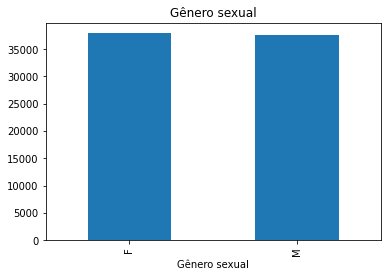

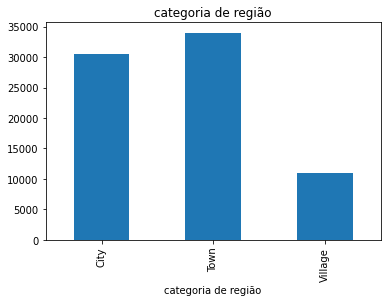

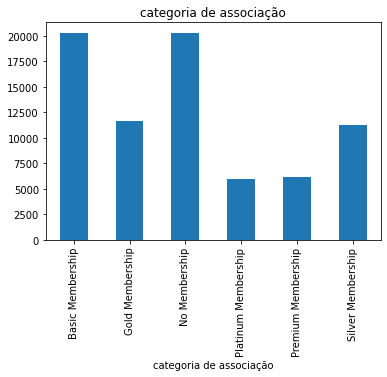

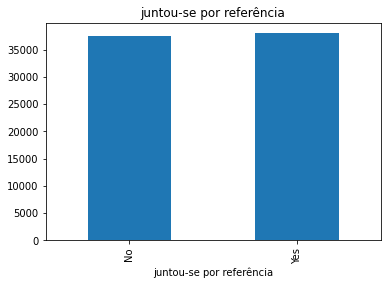

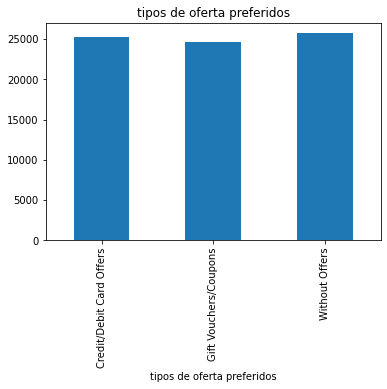

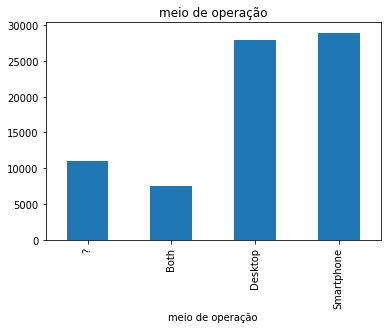

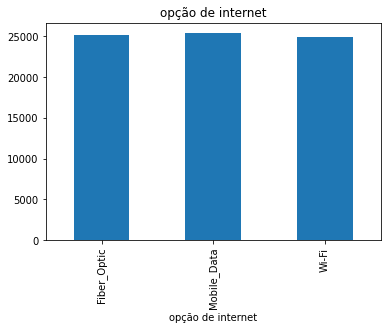

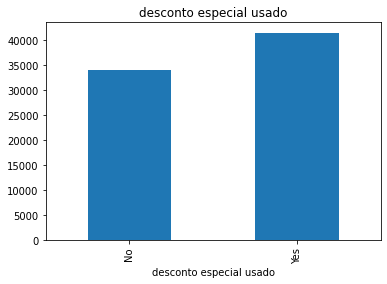

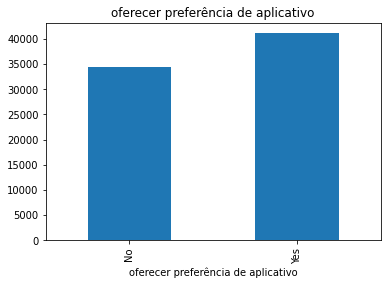

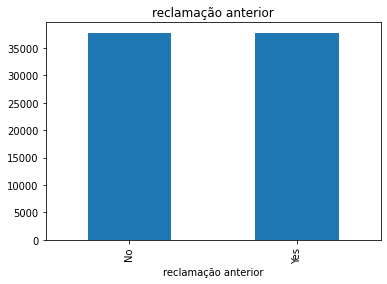

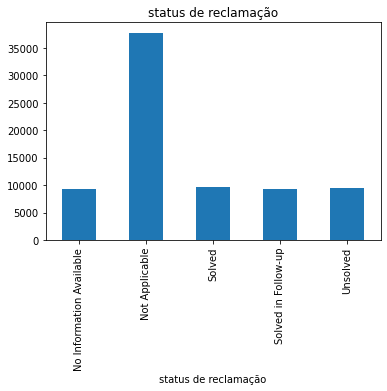

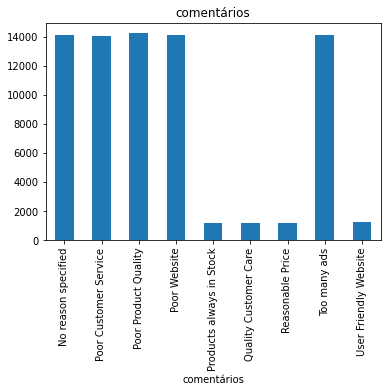

In [17]:
for i in colunas:
  df.groupby([i])['pontuação de risco de rotatividade'].sum().plot(kind='bar',subplots=False,title=i)
  plt.show();
  print('\n\n')